# Features et KPIs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTATION DES DATASETS

In [17]:
data_selection = pd.read_csv("Etape_1_selection.csv")

In [18]:
data_selection.columns

Index(['tconst', 'originalTitle', 'genres_split', 'runtimeMinutes',
       'startYear', 'nb_actor', 'nb_actress', 'nb_director', 'nb_self',
       'averageRating', 'numVotes', 'title_fr', 'fr', 'us', 'gb', 'nb_region',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Talk-Show', 'Thriller',
       'War', 'Western', 'nbrGenre', 'directorNbMovies', 'nbrActors'],
      dtype='object')

In [ ]:
# Selection tconst, nconst, category
data_title_principals = pd.read_table("donnees/title.principals.tsv/data.tsv", 
                                      na_values="\\N", 
                                      usecols=['tconst','nconst','category'], 
                                      low_memory=False)

In [ ]:
# à lancer pour les graphs
data_title_ratings = pd.read_table("donnees/title.ratings.tsv/data.tsv", 
                                   na_values="\\N", 
                                   low_memory=False)

In [ ]:
data_title_crew = pd.read_table("donnees/title.crew.tsv/data.tsv", 
                                na_values="\\N", 
                                low_memory=False)

In [ ]:
# selection type movies dès le début pour filtre de cette catégorie
data_title_basics = pd.read_table("donnees/title.basics.tsv/data.tsv",
                                  na_values="\\N", 
                                  usecols=['tconst','titleType'], 
                                  low_memory=False)
data_title_basics = data_title_basics[data_title_basics["titleType"] == "movie"]
# selection tconst movies pour filtres nécessaires dans les prochaines étapes sur les autres tables
tconst_all_movies = data_title_basics[["tconst"]]

# FONCTIONS UTILES

In [ ]:
def info_df(data):
    """Afficher données générales d'un dataframe"""
    
    print(f"Nombre de lignes : {data.shape[0]}\nNombre de colonnes : {data.shape[1]}\n")
    return data.info(), data.describe()

In [ ]:
def info_na(data):
    """Afficher le total de valeurs nulles
    Afficher le total de valeurs nulles par colonnes"""
    
    total_na = data.isnull().sum().sum()
    colonne_na = data.isnull().sum()
    
    print(f"\nNombre total de valeurs nulles : \n{total_na}")
    print(f"\nNombre de valeurs nulles par colonnes :\n\n{colonne_na}")

In [ ]:
def doublons(df, colonne):
    """Affiche nombre de doublons
    Retourne un df des infos doublons """
    
    count_col = colonne
    doublons = df.value_counts(count_col).to_frame("total").reset_index()
    doublons = doublons[doublons.total > 1]
    print(f"\nNombre de doublons : {doublons.shape[0]}")
    return doublons

# FEATURES

## Objectifs :
## Titres des films
*  Le nombre de fois qu'un film a été traduit : nombre de régions par tconst
*  Si le film a été traduit en Français, Anglais GB, Anglais US
*  Récupérer les titres traduits en Français : ce qui permettra la recherche par nom de film en Français

## Durée et genres des films
*  Filtrer la période : films de 1950 à 2022
*  Récupérer les genres : Romance, Drame, Comédie
*  Création colonnes par genre, pour exemple colonne Romance, si le film appartient à ce Romance == 1 sinon 0
*  Création colonne NbGenres : Total genre attribué au film. Si un film appartient aux catégories Drama et Romance, NbGenres = 2

## Equipes par film
*  Filtre sur les acteurs, self, actrices, réalisateurs ayant participé à un tconst de type movie
*  Création des colonnes par catégories, colonne acteur : si tconst == actor alors 1 sinon 0
*  Création colonne NbActors : total acteurs + actress + self

nb. : self = personne ayant joué son propre rôle

### Explode : récupérer une colonne par genre

In [4]:
# passage string en liste colonne knownForTitles pour réaliser la fonction explode()
data_selection["genres"] = data_selection["genres"].str.split(",")

KeyError: 'genres'

In [13]:
data_selection.columns

Index(['tconst', 'originalTitle', 'genres_split', 'runtimeMinutes',
       'startYear', 'nb_actor', 'nb_actress', 'nb_director', 'nb_self',
       'averageRating', 'numVotes', 'title_fr', 'fr', 'us', 'gb', 'nb_region',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Talk-Show', 'Thriller',
       'War', 'Western', 'nbrGenre', 'directorNbMovies', 'nbrActors'],
      dtype='object')

In [7]:
# df pour graphs sur les genres
graph_genre_total = data_selection.explode("genres_split")

In [8]:
# explode genres
data_features = data_selection.explode("genres_split")

In [14]:
data_features.head(3)

,tconst,originalTitle,genres_split,runtimeMinutes,startYear,nb_actor,nb_actress,nb_director,nb_self,averageRating,...,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western,nbrGenre,directorNbMovies,nbrActors
0,tt0015724,Dama de noche,"['Drama', 'Mystery', 'Romance']",102.0,1993.0,2.0,2.0,1.0,0.0,6.2,...,1,0,0,0,0,0,0,3,3.0,4.0
1,tt0016906,Frivolinas,"['Comedy', 'Musical']",80.0,2014.0,3.0,2.0,1.0,0.0,5.6,...,0,0,0,0,0,0,0,2,1.0,5.0
2,tt0022064,Lebbra bianca,['Drama'],100.0,1951.0,3.0,1.0,1.0,0.0,5.2,...,0,0,0,0,0,0,0,1,5.0,4.0


In [9]:
data_features.columns

Index(['tconst', 'originalTitle', 'genres_split', 'runtimeMinutes',
       'startYear', 'nb_actor', 'nb_actress', 'nb_director', 'nb_self',
       'averageRating', 'numVotes', 'title_fr', 'fr', 'us', 'gb', 'nb_region',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Talk-Show', 'Thriller',
       'War', 'Western', 'nbrGenre', 'directorNbMovies', 'nbrActors'],
      dtype='object')

In [ ]:
data_features["startYear"].isna().sum()

0

In [11]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169929 entries, 0 to 169928
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tconst            169929 non-null  object 
 1   originalTitle     169929 non-null  object 
 2   genres_split      169929 non-null  object 
 3   runtimeMinutes    169929 non-null  float64
 4   startYear         169929 non-null  float64
 5   nb_actor          169929 non-null  float64
 6   nb_actress        169929 non-null  float64
 7   nb_director       169929 non-null  float64
 8   nb_self           169929 non-null  float64
 9   averageRating     169929 non-null  float64
 10  numVotes          169929 non-null  float64
 11  title_fr          169929 non-null  object 
 12  fr                169929 non-null  float64
 13  us                169929 non-null  float64
 14  gb                169929 non-null  float64
 15  nb_region         169929 non-null  float64
 16  Action            16

In [10]:
# création colonnes drama, comédie, romance = 1
data_features = pd.concat([data_features, data_features['genres'].str.get_dummies()], axis=1)

KeyError: 'genres'

In [19]:
data_features.head(2)

,tconst,originalTitle,genres_split,runtimeMinutes,startYear,nb_actor,nb_actress,nb_director,nb_self,averageRating,...,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western,nbrGenre,directorNbMovies,nbrActors
0,tt0015724,Dama de noche,"['Drama', 'Mystery', 'Romance']",102.0,1993.0,2.0,2.0,1.0,0.0,6.2,...,1,0,0,0,0,0,0,3,3.0,4.0
1,tt0016906,Frivolinas,"['Comedy', 'Musical']",80.0,2014.0,3.0,2.0,1.0,0.0,5.6,...,0,0,0,0,0,0,0,2,1.0,5.0


In [1]:
import pandas as pd

In [3]:
data_features = pd.read_csv("Etape_1_selection.csv")
data_features.columns

Index(['tconst', 'originalTitle', 'genres_split', 'runtimeMinutes',
       'startYear', 'nb_actor', 'nb_actress', 'nb_director', 'nb_self',
       'averageRating', 'numVotes', 'title_fr', 'fr', 'us', 'gb', 'nb_region',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Talk-Show', 'Thriller',
       'War', 'Western', 'nbrGenre', 'directorNbMovies', 'nbrActors'],
      dtype='object')

In [19]:
graph1

,tconst,originalTitle,startYear,runtimeMinutes,Romance,Comedy,Drama
0,tt0015724,Dama de noche,1993.0,102.0,1,0,1
1,tt0016906,Frivolinas,2014.0,80.0,0,1,0
2,tt0022064,Lebbra bianca,1951.0,100.0,0,0,1
3,tt0025557,El negro que tenía el alma blanca,1951.0,87.0,0,0,1
4,tt0030998,You're Only Young Twice,1952.0,81.0,0,1,0
...,...,...,...,...,...,...,...
169924,tt9914828,The War of Godzilla,2015.0,102.0,0,1,0
169925,tt9914942,La vida sense la Sara Amat,2019.0,74.0,0,0,1
169926,tt9915872,My Girlfriend is a Wizard,2019.0,97.0,0,1,1
169927,tt9916362,Akelarre,2020.0,92.0,0,0,1


In [15]:
graph1["Romance"] == 1

0          True
1         False
2         False
3         False
4         False
          ...  
169924    False
169925    False
169926    False
169927    False
169928    False
Name: Romance, Length: 169929, dtype: bool

In [22]:
# df pour graphiques titleType
graph1 = data_features[['tconst', 'originalTitle', 'startYear', 'runtimeMinutes', 'Romance', 'Comedy', 'Drama' ]]
graph2 = graph1[( graph1["Romance"] == 1 ) | (graph1["Drama"] == 1)  | (graph1["Comedy"] == 1 )]
graph1.head(2)

,tconst,originalTitle,startYear,runtimeMinutes,Romance,Comedy,Drama
0,tt0015724,Dama de noche,1993.0,102.0,1,0,1
1,tt0016906,Frivolinas,2014.0,80.0,0,1,0


In [ ]:
# somme du nombre de chaque genre par film grâce au groupby
df_count_genre = data_features.groupby('tconst')['Action', 'Adult', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi',
       'Sport', 'Talk-Show', 'Thriller', 'War', 'Western'].sum().reset_index()
df_count_genre.head()

<ipython-input-22-802bef2092ec>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_count_genre = data_features.groupby('tconst')['Action', 'Adult', 'Adventure', 'Animation',


,tconst,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
0,tt0015724,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
1,tt0016906,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0022064,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,tt0025557,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,tt0030998,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# check
data_features[data_features["tconst"].str.contains("tt1597522")]

,tconst,originalTitle,genres,genres_split,runtimeMinutes,startYear,nb_actor,nb_actress,nb_director,nb_self,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
109333,tt1597522,Astérix & Obélix: Au service de sa Majesté,Adventure,"['Adventure', 'Comedy', 'Family']",110.0,2012.0,4.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
109333,tt1597522,Astérix & Obélix: Au service de sa Majesté,Comedy,"['Adventure', 'Comedy', 'Family']",110.0,2012.0,4.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
109333,tt1597522,Astérix & Obélix: Au service de sa Majesté,Family,"['Adventure', 'Comedy', 'Family']",110.0,2012.0,4.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
info_df(data_features)

Nombre de lignes : 306895
Nombre de colonnes : 44

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306895 entries, 0 to 169939
Data columns (total 44 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          306895 non-null  object 
 1   originalTitle   306895 non-null  object 
 2   genres          306895 non-null  object 
 3   genres_split    306895 non-null  object 
 4   runtimeMinutes  306895 non-null  float64
 5   startYear       306895 non-null  float64
 6   nb_actor        306895 non-null  float64
 7   nb_actress      306895 non-null  float64
 8   nb_director     306895 non-null  float64
 9   nb_self         306895 non-null  float64
 10  averageRating   306895 non-null  float64
 11  numVotes        306895 non-null  float64
 12  title_fr        306895 non-null  object 
 13  fr              306895 non-null  float64
 14  us              306895 non-null  float64
 15  gb              306895 non-null  float64
 16  nb_re

(None,
        runtimeMinutes      startYear       nb_actor     nb_actress  \
 count   306895.000000  306895.000000  306895.000000  306895.000000   
 mean       100.330044    1997.670894       2.584884       1.547950   
 std         20.498046      20.165154       1.259407       1.043924   
 min         70.000000    1950.000000       0.000000       0.000000   
 25%         87.000000    1983.000000       2.000000       1.000000   
 50%         95.000000    2005.000000       3.000000       1.000000   
 75%        108.000000    2014.000000       3.000000       2.000000   
 max        239.000000    2022.000000      10.000000      10.000000   
 
          nb_director        nb_self  averageRating      numVotes  \
 count  306895.000000  306895.000000  306895.000000  3.068950e+05   
 mean        1.018358       0.060089       5.106390  5.400105e+03   
 std         0.491419       0.483667       2.485851  4.071028e+04   
 min         0.000000       0.000000       0.000000  0.000000e+00   
 25%   

In [ ]:
# vérification si films catégorie adulte dans la sélection
data_features["Adult"].sum()

11

In [ ]:
# exclure les 11 films de notre sélection
data_features = data_features[data_features["Adult"] == 0]

In [ ]:
# suppression des doublons pour merge avec data_features
data_features.drop_duplicates('tconst', inplace=True)

In [ ]:
doublons(data_features, ["tconst"])


Nombre de doublons : 0


,tconst,total


In [21]:
data_features.genres_split

0         ['Drama', 'Mystery', 'Romance']
1                   ['Comedy', 'Musical']
2                               ['Drama']
3                    ['Drama', 'Musical']
4                              ['Comedy']
                       ...               
169924     ['Action', 'Comedy', 'Family']
169925                          ['Drama']
169926     ['Comedy', 'Drama', 'Fantasy']
169927               ['Drama', 'History']
169928                          ['Drama']
Name: genres_split, Length: 169929, dtype: object

In [ ]:
# suppression des colonnes car on ne veut que le compte des genres qui seront mergés, genres inutiles pour features
data_features.drop(['genres', 'Action', 'Adult', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',     
       'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi',
       'Sport', 'Talk-Show', 'Thriller', 'War', 'Western'], axis=1, inplace=True)

In [ ]:
# concat des 2 df pour 1 ligne par film total final par genre
data_features = pd.merge(data_features, df_count_genre, how='left', on='tconst')
data_features.head(2)

,tconst,originalTitle,genres_split,runtimeMinutes,startYear,nb_actor,nb_actress,nb_director,nb_self,averageRating,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
0,tt0015724,Dama de noche,"['Drama', 'Mystery', 'Romance']",102.0,1993.0,2.0,2.0,1.0,0.0,6.2,...,1,0,0,1,0,0,0,0,0,0
1,tt0016906,Frivolinas,"['Comedy', 'Musical']",80.0,2014.0,3.0,2.0,1.0,0.0,5.6,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_features.columns

Index(['tconst', 'originalTitle', 'genres_split', 'runtimeMinutes',
       'startYear', 'nb_actor', 'nb_actress', 'nb_director', 'nb_self',
       'averageRating', 'numVotes', 'title_fr', 'fr', 'us', 'gb', 'nb_region',
       'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Talk-Show', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [ ]:
# liste colonnes pour réaliser la somme de chaque genre
somme_liste = ['Action', 'Adult', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi',
       'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']

In [ ]:
# nouvelle colonne nb total de genres par film
data_features['nbrGenre'] = data_features[somme_liste].sum(axis=1)
data_features.head()

,tconst,originalTitle,genres_split,runtimeMinutes,startYear,nb_actor,nb_actress,nb_director,nb_self,averageRating,...,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western,nbrGenre
0,tt0015724,Dama de noche,"['Drama', 'Mystery', 'Romance']",102.0,1993.0,2.0,2.0,1.0,0.0,6.2,...,0,0,1,0,0,0,0,0,0,3
1,tt0016906,Frivolinas,"['Comedy', 'Musical']",80.0,2014.0,3.0,2.0,1.0,0.0,5.6,...,0,0,0,0,0,0,0,0,0,2
2,tt0022064,Lebbra bianca,['Drama'],100.0,1951.0,3.0,1.0,1.0,0.0,5.2,...,0,0,0,0,0,0,0,0,0,1
3,tt0025557,El negro que tenía el alma blanca,"['Drama', 'Musical']",87.0,1951.0,3.0,1.0,0.0,0.0,6.8,...,0,0,0,0,0,0,0,0,0,2
4,tt0030998,You're Only Young Twice,['Comedy'],81.0,1952.0,4.0,0.0,1.0,0.0,6.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169940 entries, 0 to 169939
Data columns (total 44 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          169940 non-null  object 
 1   originalTitle   169940 non-null  object 
 2   genres_split    169940 non-null  object 
 3   runtimeMinutes  169940 non-null  float64
 4   startYear       169940 non-null  float64
 5   nb_actor        169940 non-null  float64
 6   nb_actress      169940 non-null  float64
 7   nb_director     169940 non-null  float64
 8   nb_self         169940 non-null  float64
 9   averageRating   169940 non-null  float64
 10  numVotes        169940 non-null  float64
 11  title_fr        169940 non-null  object 
 12  fr              169940 non-null  float64
 13  us              169940 non-null  float64
 14  gb              169940 non-null  float64
 15  nb_region       169940 non-null  float64
 16  Action          169940 non-null  int64  
 17  Adult     

### Récupération des réalisateurs ("director") pour calculer le nombre de films réalisés 

In [ ]:
# selection director
data_title_principals = data_title_principals[(data_title_principals['category'] == 'director')]

### Colonnes compte des catégories

In [ ]:
# création des colonnes director, actor, actress, self, si individu joue un rôle dans le film == 1 dans colonne "job"
data_title_principals['director'] = np.where((data_title_principals["category"] == 'director'), 1, 0)
data_title_principals.head(2)

,tconst,nconst,category,director
1,tt0000001,nm0005690,director,1
3,tt0000002,nm0721526,director,1


In [ ]:
# Compte des catégories
data_title_principals.category.value_counts()

director    5547742
Name: category, dtype: int64

In [ ]:
# filtre table sur les movies uniquement en merge tous les films movies qui existent
data_title_principals_movies = tconst_all_movies.merge(data_title_principals, how="left", on='tconst')
data_title_principals_movies.head(2)

,tconst,nconst,category,director
0,tt0000502,nm0063413,director,1.0
1,tt0000574,nm0846879,director,1.0


In [ ]:
# drop nan suite à la merge
data_title_principals_movies.dropna(subset=["category"], axis=0, inplace=True)

In [ ]:
# compte du nombre de films par nconst = nombre de films réalisés par réalisateurs
data_count_dir = data_title_principals_movies.groupby('nconst')['director'].sum().to_frame()

In [ ]:
# check nombre de films réalisés par réalisateurs
data_count_dir.value_counts()

director
1.0         129156
2.0          32306
3.0          14530
4.0           7961
5.0           5053
             ...  
144.0            1
146.0            1
153.0            1
157.0            1
438.0            1
Length: 162, dtype: int64

In [ ]:
data_count_dir.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206346 entries, nm0000005 to nm9993594
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   director  206346 non-null  float64
dtypes: float64(1)
memory usage: 3.1+ MB


In [ ]:
# merge avec le df title principals, merge info nb total des films realisés  
data_dir = data_title_principals_movies.merge(data_count_dir, how='left', on='nconst', suffixes=[None, 'NbMovies'])

In [ ]:
data_dir.head()

,tconst,nconst,category,director,directorNbMovies
0,tt0000502,nm0063413,director,1.0,30.0
1,tt0000574,nm0846879,director,1.0,1.0
2,tt0000591,nm0141150,director,1.0,3.0
3,tt0000615,nm0533958,director,1.0,1.0
4,tt0000630,nm0143333,director,1.0,59.0


In [ ]:
data_dir = data_dir[["tconst", "directorNbMovies"]]
data_features = data_features.merge(data_dir, how='left', on='tconst', suffixes=[None, 'NbMovies'])

In [ ]:
data_features.head()

,tconst,originalTitle,genres_split,runtimeMinutes,startYear,nb_actor,nb_actress,nb_director,nb_self,averageRating,...,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western,nbrGenre,directorNbMovies
0,tt0015724,Dama de noche,"['Drama', 'Mystery', 'Romance']",102.0,1993.0,2.0,2.0,1.0,0.0,6.2,...,0,1,0,0,0,0,0,0,3,3.0
1,tt0016906,Frivolinas,"['Comedy', 'Musical']",80.0,2014.0,3.0,2.0,1.0,0.0,5.6,...,0,0,0,0,0,0,0,0,2,1.0
2,tt0022064,Lebbra bianca,['Drama'],100.0,1951.0,3.0,1.0,1.0,0.0,5.2,...,0,0,0,0,0,0,0,0,1,5.0
3,tt0025557,El negro que tenía el alma blanca,"['Drama', 'Musical']",87.0,1951.0,3.0,1.0,0.0,0.0,6.8,...,0,0,0,0,0,0,0,0,2,NaN
4,tt0030998,You're Only Young Twice,['Comedy'],81.0,1952.0,4.0,0.0,1.0,0.0,6.0,...,0,0,0,0,0,0,0,0,1,13.0


In [ ]:
data_features.drop_duplicates(subset="tconst", inplace=True, keep="first")

### Comptage du nombre d’acteurs 

In [ ]:
# ajout de la colonne nombre d'acteurs dans le film
data_features['nbrActors'] = data_features['nb_actor'] + data_features['nb_actress'] + data_features['nb_self']
data_features.head()

,tconst,originalTitle,genres_split,runtimeMinutes,startYear,nb_actor,nb_actress,nb_director,nb_self,averageRating,...,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western,nbrGenre,directorNbMovies,nbrActors
0,tt0015724,Dama de noche,"['Drama', 'Mystery', 'Romance']",102.0,1993.0,2.0,2.0,1.0,0.0,6.2,...,1,0,0,0,0,0,0,3,3.0,4.0
1,tt0016906,Frivolinas,"['Comedy', 'Musical']",80.0,2014.0,3.0,2.0,1.0,0.0,5.6,...,0,0,0,0,0,0,0,2,1.0,5.0
2,tt0022064,Lebbra bianca,['Drama'],100.0,1951.0,3.0,1.0,1.0,0.0,5.2,...,0,0,0,0,0,0,0,1,5.0,4.0
3,tt0025557,El negro que tenía el alma blanca,"['Drama', 'Musical']",87.0,1951.0,3.0,1.0,0.0,0.0,6.8,...,0,0,0,0,0,0,0,2,NaN,4.0
4,tt0030998,You're Only Young Twice,['Comedy'],81.0,1952.0,4.0,0.0,1.0,0.0,6.0,...,0,0,0,0,0,0,0,1,13.0,4.0


# MERGES FINAUX ET TRAITEMENT DES VALEURS NULLES

In [ ]:
# traitement des valeurs nulles directorNbMovies
data_features["directorNbMovies"] = data_features["directorNbMovies"].fillna(0)

In [ ]:
# check doublons
doublons(data_features, ["tconst"]).head()


Nombre de doublons : 0


,tconst,total


In [ ]:
# suppression des doublons
data_features.drop_duplicates(subset=["tconst"], inplace=True)

In [ ]:
# vérification du nombre de films pour adultes de la colonne Adult
data_features["Adult"].value_counts()

0    169929
1        11
Name: Adult, dtype: int64

In [ ]:
# exclusion des films pour adultes
data_features = data_features[data_features.Adult != 1]
data_features.drop(columns="Adult", inplace=True)

In [ ]:
# Vérification des valeurs nulles
info_na(data_features)


Nombre total de valeurs nulles : 
0

Nombre de valeurs nulles par colonnes :

tconst              0
originalTitle       0
genres_split        0
runtimeMinutes      0
startYear           0
nb_actor            0
nb_actress          0
nb_director         0
nb_self             0
averageRating       0
numVotes            0
title_fr            0
fr                  0
us                  0
gb                  0
nb_region           0
Action              0
Adventure           0
Animation           0
Biography           0
Comedy              0
Crime               0
Documentary         0
Drama               0
Family              0
Fantasy             0
Film-Noir           0
Game-Show           0
History             0
Horror              0
Music               0
Musical             0
Mystery             0
News                0
Reality-TV          0
Romance             0
Sci-Fi              0
Sport               0
Talk-Show           0
Thriller            0
War                 0
Western            

In [ ]:
# Verification du volume final de la sélection
info_df(data_features)

Nombre de lignes : 169929
Nombre de colonnes : 45

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169929 entries, 0 to 183681
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tconst            169929 non-null  object 
 1   originalTitle     169929 non-null  object 
 2   genres_split      169929 non-null  object 
 3   runtimeMinutes    169929 non-null  float64
 4   startYear         169929 non-null  float64
 5   nb_actor          169929 non-null  float64
 6   nb_actress        169929 non-null  float64
 7   nb_director       169929 non-null  float64
 8   nb_self           169929 non-null  float64
 9   averageRating     169929 non-null  float64
 10  numVotes          169929 non-null  float64
 11  title_fr          169929 non-null  object 
 12  fr                169929 non-null  float64
 13  us                169929 non-null  float64
 14  gb                169929 non-null  float64
 15  nb_region        

(None,
        runtimeMinutes      startYear      nb_actor     nb_actress  \
 count   169929.000000  169929.000000  169929.00000  169929.000000   
 mean        99.719871    1997.205168       2.58671       1.595460   
 std         20.090885      20.345804       1.26853       1.059335   
 min         70.000000    1950.000000       0.00000       0.000000   
 25%         87.000000    1982.000000       2.00000       1.000000   
 50%         95.000000    2005.000000       3.00000       2.000000   
 75%        107.000000    2014.000000       3.00000       2.000000   
 max        239.000000    2022.000000      10.00000      10.000000   
 
          nb_director        nb_self  averageRating      numVotes  \
 count  169929.000000  169929.000000  169929.000000  1.699290e+05   
 mean        1.013717       0.047078       4.924904  3.823543e+03   
 std         0.488613       0.423781       2.626550  3.438828e+04   
 min         0.000000       0.000000       0.000000  0.000000e+00   
 25%         1.0

In [ ]:
data_features.tconst.value_counts()

tt7070818    1
tt2920808    1
tt0096986    1
tt2034114    1
tt0197759    1
            ..
tt2514284    1
tt0203102    1
tt0417907    1
tt1827578    1
tt1762406    1
Name: tconst, Length: 169929, dtype: int64

# FEATURE ADDITIONNELLE : Directors
-  Faire le lien avec titre et director : 1 colonne par nconst si le réalisateur a réalisé le film = 1 sinon = 0

In [ ]:
# Filtre sur les réalisateurs (données non nulles)
data_title_crew = data_title_crew[data_title_crew["directors"].notna()]

In [ ]:
# Suppression des writers
del data_title_crew['writers']

In [ ]:
# Merge des data_features et data_title_crew (sans NaN pour director et sans writers)
df = pd.merge(data_features, data_title_crew, how='left', on='tconst')

In [ ]:
# Sélection des réalisateurs dont les films ont des notes supérieures à 8
real_8 = df[df['averageRating'] > 8]
df_real_8 = real_8['directors'].str.get_dummies()

In [ ]:
# Visualisation des réalisateurs dont les films ont des notes supérieures à 8
df_real_8.head()

,nm0000005,nm0000019,nm0000033,"nm0000037,nm0002045",nm0000040,nm0000041,nm0000076,nm0000108,"nm0000110,nm0139081,nm0038936",nm0000122,...,"nm9904568,nm3986145",nm9913084,nm9929791,nm9939839,nm9955426,nm9958933,"nm9963166,nm10288369",nm9975647,nm9982663,nm9987215
127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Jointure entre notre séléction de films et le df des réalisateurs dont les films ont des notes supérieures à 8
df_join = df.join(df_real_8)

In [ ]:
# Remplacement des NAN par 0
df_join.fillna(0, inplace=True)

In [ ]:
#Visualisationdu df join
df_join.describe()

,runtimeMinutes,startYear,nb_actor,nb_actress,nb_director,nb_self,averageRating,numVotes,fr,us,...,"nm9904568,nm3986145",nm9913084,nm9929791,nm9939839,nm9955426,nm9958933,"nm9963166,nm10288369",nm9975647,nm9982663,nm9987215
count,169929.000000,169929.000000,169929.00000,169929.000000,169929.000000,169929.000000,169929.000000,1.699290e+05,169929.000000,169929.000000,...,169929.000000,169929.000000,169929.000000,169929.000000,169929.000000,169929.000000,169929.000000,169929.000000,169929.000000,169929.000000
mean,99.719871,1997.205168,2.58671,1.595460,1.013717,0.047078,4.924904,3.823543e+03,0.218056,0.509366,...,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006
std,20.090885,20.345804,1.26853,1.059335,0.488613,0.423781,2.626550,3.438828e+04,0.412927,0.499914,...,0.002426,0.002426,0.002426,0.002426,0.002426,0.002426,0.002426,0.002426,0.002426,0.002426
min,70.000000,1950.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,87.000000,1982.000000,2.00000,1.000000,1.000000,0.000000,4.200000,1.100000e+01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,2005.000000,3.00000,2.000000,1.000000,0.000000,5.800000,5.800000e+01,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,107.000000,2014.000000,3.00000,2.000000,1.000000,0.000000,6.700000,3.610000e+02,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,239.000000,2022.000000,10.00000,10.000000,10.000000,10.000000,10.000000,2.513534e+06,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Nettoyage des titres sans accents, ni majuscules pour faciliter la recherche de titres
df_join["title"] = df_join["title_fr"].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower()
df_join["originaltitle"] = df_join["originalTitle"].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower()

In [ ]:
# Enregistrement des dataframes finaux sous csv
data_features.to_csv("donnees/dataset_non_num.csv", index=False)

In [ ]:
df_join.to_csv("donnees/data_set_features.csv", index=False)

# VISUALISATION DES DONNEES

## Préparation df pour analyses de notre sélection de films

In [ ]:
# data avec tous les genres de chaque film pour graphiques
graph1.head()
graph_complet = graph1.copy()
graph_complet.dropna(axis=0, inplace=True)
graph_complet = graph_complet.merge(data_title_ratings, on="tconst", how="left")
graph_complet.head(2)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0015724,Dama de noche,1993.0,102.0,Drama,6.2,25.0
1,tt0015724,Dama de noche,1993.0,102.0,Mystery,6.2,25.0


In [ ]:
graph_complet.tconst.value_counts()

tt4684610     3
tt1311638     3
tt0441025     3
tt1051920     3
tt15079066    3
             ..
tt9773698     1
tt0449389     1
tt0140686     1
tt0042058     1
tt7070818     1
Name: tconst, Length: 169940, dtype: int64

In [ ]:
# data avec genre principal comédie, romance, drame
graph_cdr = graph1[(graph1['genres'] == "Romance") | (graph1['genres'] == "Drama") | (graph1['genres'] == "Comedy")]
graph_cdr = graph_cdr.merge(data_title_ratings, on="tconst", how="left")
graph_cdr = graph_cdr.merge(graph_genre_total[["tconst", "genres"]], on="tconst", how="left")
graph_cdr.dropna(axis=0, inplace=True)
graph_cdr.drop(columns="genres_y", inplace=True)
graph_cdr = graph_cdr.sort_values(by=["tconst", "genres_x"])
graph_cdr.drop_duplicates(subset="tconst", keep="first")
graph_cdr.rename(columns={"genres_x":"genres"}, inplace=True)
graph_cdr.head()

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0015724,Dama de noche,1993.0,102.0,Drama,6.2,25.0
1,tt0015724,Dama de noche,1993.0,102.0,Drama,6.2,25.0
2,tt0015724,Dama de noche,1993.0,102.0,Drama,6.2,25.0
3,tt0015724,Dama de noche,1993.0,102.0,Romance,6.2,25.0
4,tt0015724,Dama de noche,1993.0,102.0,Romance,6.2,25.0


In [ ]:
graph_cdr.columns

Index(['tconst', 'originalTitle', 'startYear', 'runtimeMinutes', 'genres',
       'averageRating', 'numVotes'],
      dtype='object')

## Graphiques

Text(0, 0.5, 'Nb Films\n')

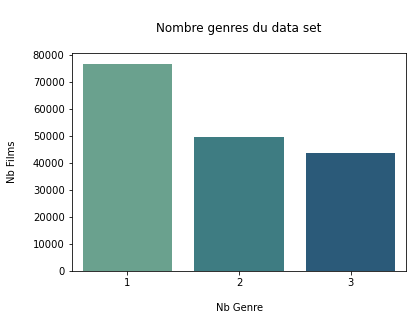

In [ ]:
# afficher le nombre de genres par film
palette_code = "crest"

sns.countplot(data=data_features,
            x="nbrGenre",
            palette=palette_code)
plt.title("\nNombre genres du data set\n")
plt.xlabel("\nNb Genre\n")
plt.ylabel("Nb Films\n")

In [ ]:
graph_complet.columns

Index(['tconst', 'originalTitle', 'startYear', 'runtimeMinutes', 'genres',
       'averageRating', 'numVotes'],
      dtype='object')

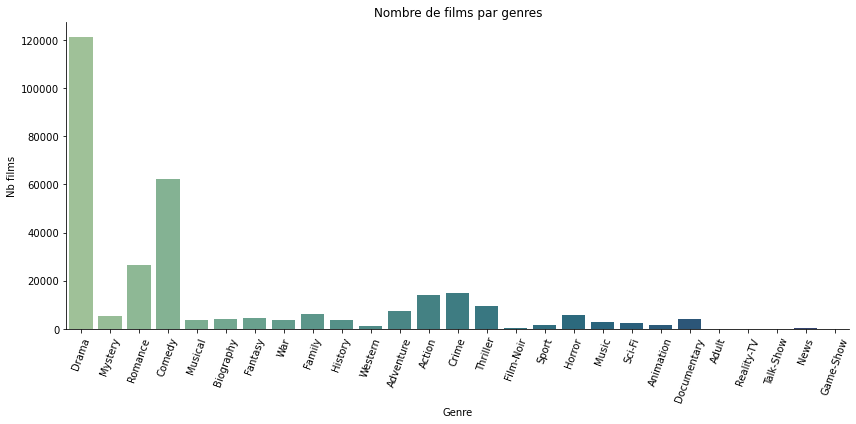

In [ ]:
palette_code = "crest"

sns.catplot(data=graph_complet,
            x="genres",
            kind="count",
            height=6,
            aspect=2,
            legend=False,
            ci=None,
            palette=palette_code
           ).set(title='Nombre de films par genres',
                 ylabel="Nb films",
                 xlabel="Genre"
                )
plt.xticks(rotation=70)
plt.tight_layout()
# Afficher graph
plt.show()

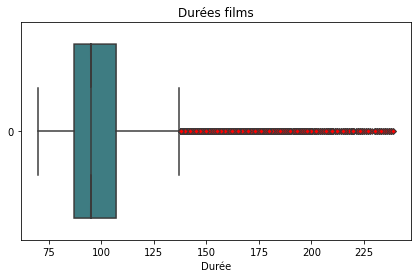

In [ ]:
palette_code = "crest"

plt.subplots(figsize=(7,4))

# set up des outlier forme losange et couleur rouge
red_outlier = dict(markerfacecolor="r", marker="D", markersize=4)

# Graphique box plot
sns.boxplot(data=data_features["runtimeMinutes"], 
            orient="h", 
            notch=True, 
            flierprops=red_outlier,
            palette=palette_code)

# titre
plt.title("Durées films")

# Légende y
plt.xlabel("Durée")

# Afficher graph
plt.show()

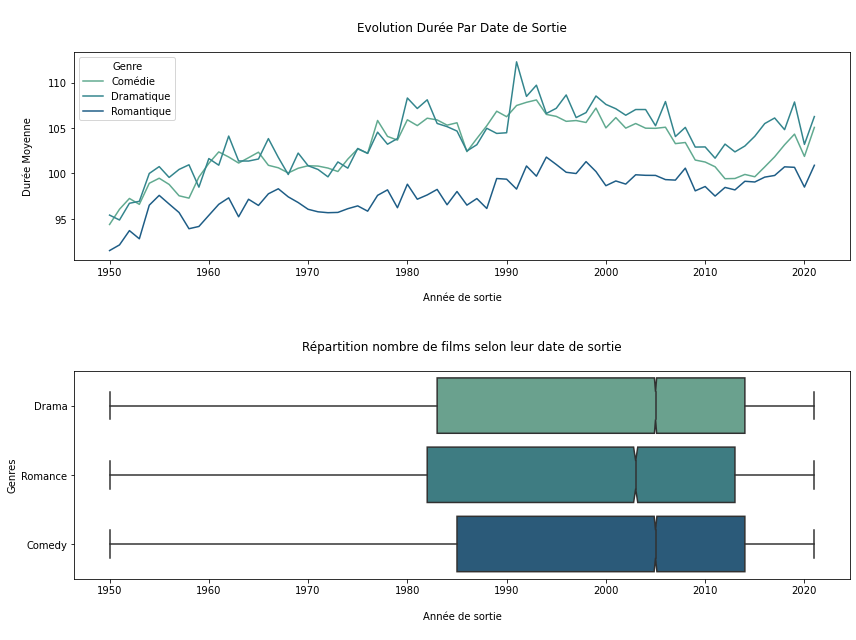

In [ ]:
##### -------------------------- SELECTION VERSION FINALE EVOLUTION MOYENNE DUREE DANS LE TEMPS SNS -------------------------- #####
palette_code = "crest"

plt.subplots(figsize=(12,9))
plt.tight_layout()


# ------------------ Line Plot ------------------#

plt.subplot(2, 1, 1)

sns.lineplot(data=graph_cdr,
                x="startYear", 
                y="runtimeMinutes",
                hue="genres",
                ci=None,
                label="Comédie",
                palette=palette_code).set(title="\nEvolution Durée Par Date de Sortie\n")

plt.ylabel("Durée Moyenne\n")
plt.xlabel("\nAnnée de sortie\n")

plt.legend(title="Genre",
           labels=["Comédie", "Dramatique", "Romantique"])


# ------------------ Box Plot ------------------#


red_outlier = dict(markerfacecolor="r", marker="D", markersize=4)

# titre
#plt.title("\nRépartition nombre de films selon leur date de sortie\n")

plt.subplot(2, 1, 2)
sns.boxplot(data=graph_cdr[["startYear", "genres"]],
            x="startYear",
            y="genres",
            orient="h", 
            notch=True, 
            flierprops=red_outlier,
            palette=palette_code).set(title="\nRépartition nombre de films selon leur date de sortie\n")
# Légende x y
plt.xlabel("\nAnnée de sortie\n")
plt.ylabel("Genres")


plt.tight_layout()
plt.show()

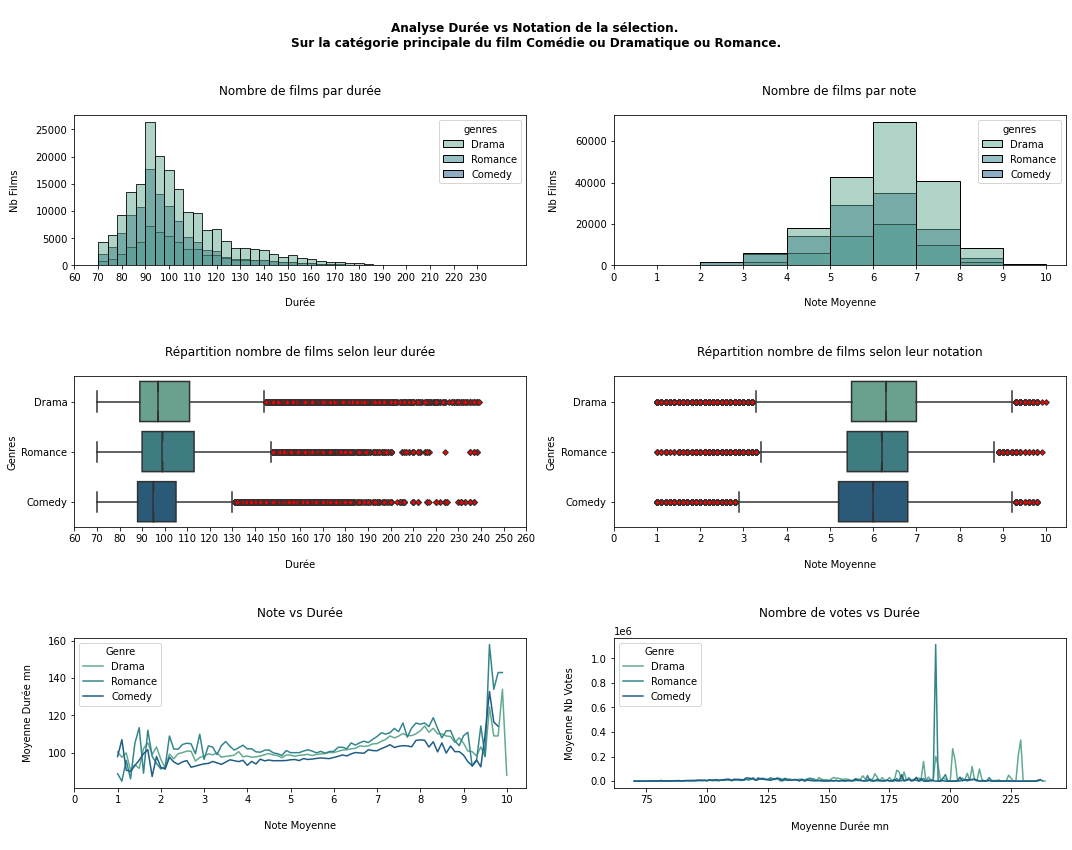

In [ ]:
plt.subplots(figsize=(15,12))
##### -------------------------- SELECTION VERSION FINALE NOTE MOYENNE DUREE SNS -------------------------- #####
palette_code = "crest"

plt.suptitle("\nAnalyse Durée vs Notation de la sélection. \nSur la catégorie principale du film Comédie ou Dramatique ou Romance.\n",
             fontsize = 'large',
             weight = 'bold')

# ------------------ Line Plots ------------------#

plt.subplot(3, 2, 5)
sns.lineplot(data=graph_cdr,
                x="averageRating", 
                y="runtimeMinutes",
                hue="genres", 
                ci=None,
                palette=palette_code)

plt.title("\nNote vs Durée\n")
plt.xlabel("\nNote Moyenne\n")
plt.ylabel("Moyenne Durée mn\n")

plt.legend(title="Genre",
            loc="upper left")

plt.xticks(np.arange(0, 11, 1))


plt.subplot(3, 2, 6)
sns.lineplot(data=graph_cdr,
                x="runtimeMinutes", 
                y="numVotes",
                hue="genres",
                ci=None,
                palette=palette_code)
plt.title("\nNombre de votes vs Durée\n")
plt.ylabel("Moyenne Nb Votes\n")
plt.xlabel("\nMoyenne Durée mn\n")

plt.legend(title="Genre",
            loc="upper left")


red_outlier = dict(markerfacecolor="r", marker="D", markersize=4)

# ------------------ Box Plot ------------------#

plt.subplot(3, 2, 4)
sns.boxplot(data=graph_cdr,
            x="averageRating",
            y="genres",
            orient="h", 
            notch=True, 
            flierprops=red_outlier,
            palette=palette_code).set(title="\nRépartition nombre de films selon leur notation\n",
                                        xlabel="\nNote Moyenne\n")
plt.xticks(np.arange(0, 11, 1))
plt.ylabel("Genres")
            
plt.subplot(3, 2, 3)
sns.boxplot(data=graph_cdr,
            x="runtimeMinutes",
            y="genres",
            orient="h", 
            notch=True, 
            flierprops=red_outlier,
            palette=palette_code).set(
                title="\nRépartition nombre de films selon leur durée\n",
                xlabel="\nDurée\n")
plt.xticks(np.arange(60, 261, 10))
plt.ylabel("Genres")



# ------------------ Histo Plot ------------------#

plt.subplot(3, 2, 2)

sns.histplot(data=graph_cdr,
            x="averageRating",
            hue="genres",
            binwidth=1,
            palette=palette_code)
plt.title("\nNombre de films par note\n")
plt.xlabel("\nNote Moyenne\n")
plt.ylabel("Nb Films\n")
plt.xticks(np.arange(0, 11, 1))


plt.subplot(3, 2, 1)

sns.histplot(data=graph_cdr,
            x="runtimeMinutes",
            hue="genres",
            binwidth=4,
            palette=palette_code)
plt.title("\nNombre de films par durée\n")
plt.xlabel("\nDurée\n")
plt.ylabel("Nb Films\n")
plt.xticks(np.arange(60, 240, 10))

plt.tight_layout()
plt.show()

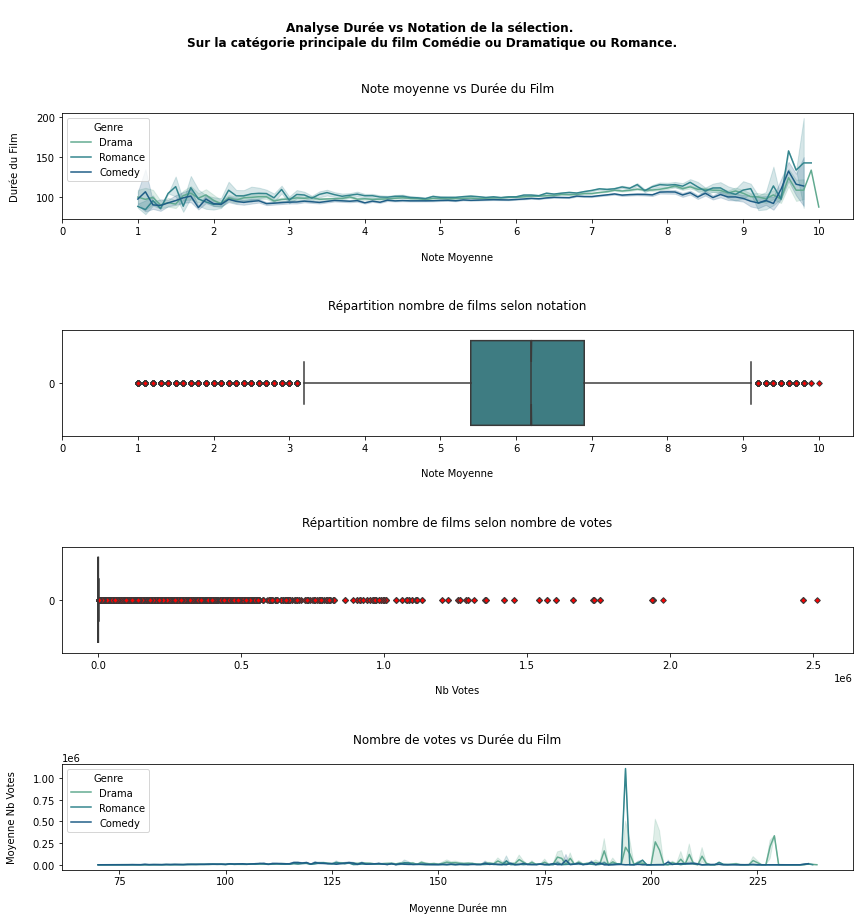

In [ ]:
plt.subplots(figsize=(12,13))
plt.tight_layout()

plt.suptitle("\nAnalyse Durée vs Notation de la sélection. \nSur la catégorie principale du film Comédie ou Dramatique ou Romance.\n",
             fontsize = 'large',
             weight = 'bold')

# ------------------ Line Plot ------------------#

plt.subplot(4, 1, 1)
# Graphique en ligne
sns.lineplot(data=graph_cdr,
                x="averageRating", 
                y="runtimeMinutes",
                hue="genres",
                palette=palette_code)
plt.title("\nNote moyenne vs Durée du Film\n")
plt.xlabel("\nNote Moyenne\n")
plt.ylabel("Durée du Film\n")
plt.xticks(np.arange(0, 11, 1))

plt.legend(title="Genre",
            loc="upper left")


plt.subplot(4, 1, 2)
red_outlier = dict(markerfacecolor="r", marker="D", markersize=4)

# ------------------ Box Plot ------------------#

# Graphique box plot
sns.boxplot(data=graph_cdr["averageRating"], 
            orient="h", 
            notch=True, 
            flierprops=red_outlier,
            palette=palette_code)
# titre
plt.title("\nRépartition nombre de films selon notation\n")
# Légende x
plt.xlabel("\nNote Moyenne\n")
plt.xticks(np.arange(0, 11, 1))

plt.subplot(4, 1, 3)
sns.boxplot(data=graph_cdr["numVotes"], 
            orient="h", 
            notch=True, 
            flierprops=red_outlier,
            palette=palette_code)
# titre
plt.title("\nRépartition nombre de films selon nombre de votes\n")
# Légende x
plt.xlabel("\nNb Votes\n")
#plt.xticks(np.arange(0, 11, 1))

# ------------------ Line Plot ------------------#

plt.subplot(4, 1, 4)
sns.lineplot(data=graph_cdr,
                x="runtimeMinutes", 
                y="numVotes",
                hue="genres",
                palette=palette_code)
plt.title("\nNombre de votes vs Durée du Film\n")
plt.ylabel("Moyenne Nb Votes\n")
plt.xlabel("\nMoyenne Durée mn")

plt.legend(title="Genre",
           loc="upper left")

plt.tight_layout()
plt.show()

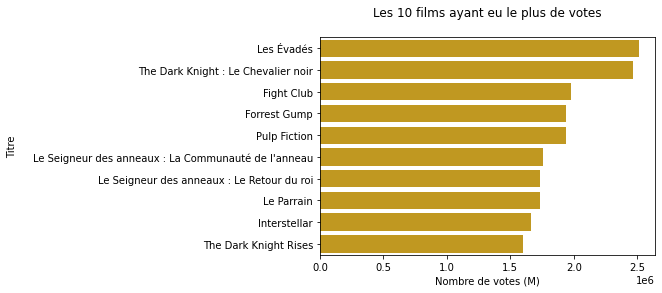

In [ ]:
top10 = real_8.sort_values('numVotes', axis=0, ascending=False)

sns.barplot(y=top10['title_fr'].head(10), x=top10['numVotes'], color='#DBA506')
plt.title("Les 10 films ayant eu le plus de votes\n")
plt.ylabel("Titre\n")
plt.xlabel("Nombre de votes (M)")
plt.show() 

In [ ]:
notre_palette = sns.blend_palette(['#37474F', '#DBA506'],10)
print(notre_palette)

[(0.21568627450980393, 0.2784313725490196, 0.30980392156862746), (0.2863052672049212, 0.31890811226451365, 0.2783698577470204), (0.35692425990003845, 0.3593848519800077, 0.24693579392541332), (0.43006535947712415, 0.4013071895424837, 0.21437908496732028), (0.5006843521722415, 0.4417839292579777, 0.1829450211457132), (0.5738254517493271, 0.4837062668204537, 0.15038831218762017), (0.6444444444444444, 0.5241830065359477, 0.1189542483660131), (0.7175855440215302, 0.5661053440984237, 0.08639753940792005), (0.7882045367166474, 0.6065820838139178, 0.05496347558631298), (0.8588235294117647, 0.6470588235294118, 0.023529411764705882)]


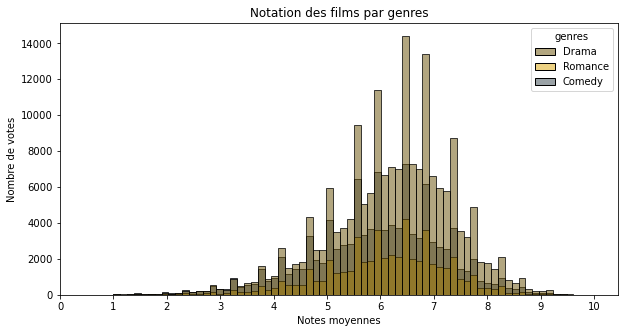

In [ ]:
fig = plt.figure(figsize = (10, 5))
notre_palette = sns.blend_palette(['#DBA506', '#37474F'],10)
notre_palette_jaune = notre_palette[3]

a = sns.histplot(data = graph_cdr, 
                 x = "averageRating", 
                 hue = "genres",
                 palette={
    'Drama': '#674e03',
    'Romance': '#dba506',
    'Comedy': '#37474F'},
                 bins=70)
plt.title("Notation des films par genres")
plt.xlabel("Notes moyennes")
plt.ylabel("Nombre de votes")
plt.xticks(np.arange(0, 11, 1))
plt.show()